In [39]:
%run -i myimports.py   

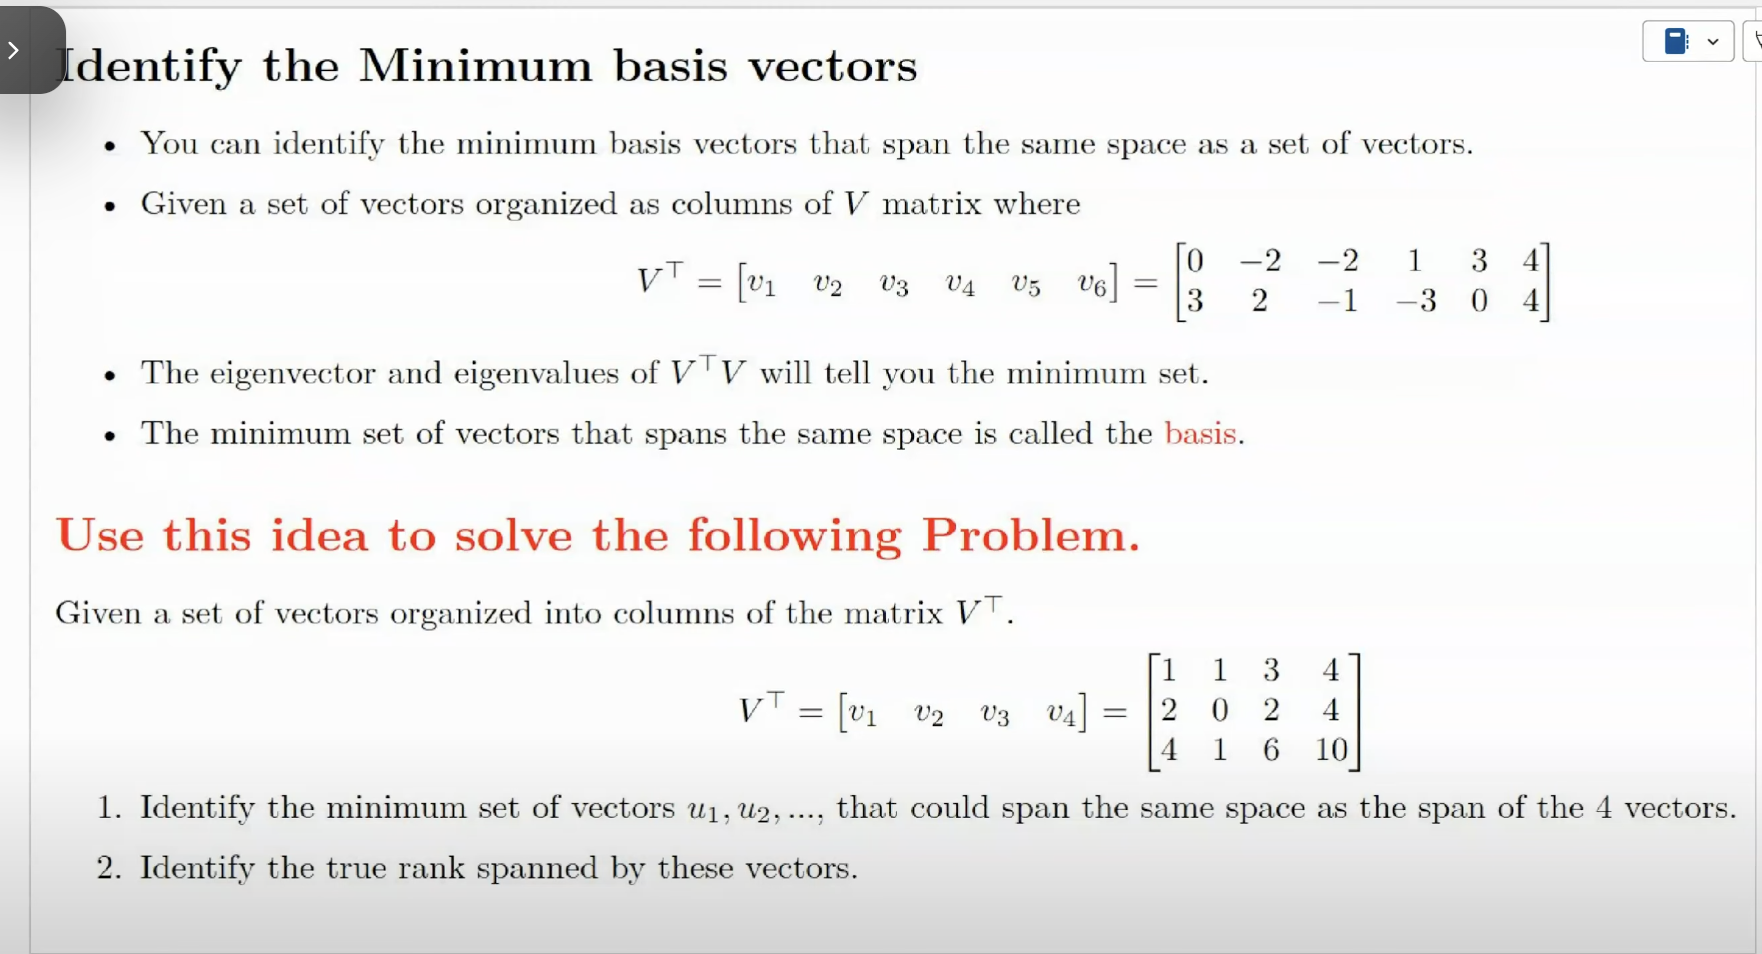 

\begin{align}
    % 1. Data matrix
    A &= \begin{bmatrix} v_1 & v_2 & v_3 & v_4 \end{bmatrix} \\[4pt]
    % 2. Gram / covariance-like matrix
    G &= A A^{\top} \\[4pt]
    % 3. Eigendecomposition of a symmetric matrix
    G &= U \,\Lambda\, U^{\top}, \qquad U^{\top} U = I \\[4pt]
    % 4. Rank from eigenvalues
    \operatorname{rank}(A) &= \operatorname{rank}(G)
     = \#\{\, \lambda_i \neq 0 \,\} \\[4pt]
    % 5. Extracting eigenvectors (columns)
    u_i &= U_{:,i} \\[4pt]
    % 6. Forming the reduced basis
    \tilde U &= \begin{bmatrix} u_{i_1} & u_{i_2} \end{bmatrix}
    \end{align}
    

In [11]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

v1 = array([[1], [2], [4]])
v2 = array([[1], [0], [1]])
v3 = array([[3], [2], [6]])
v4 = array([[4], [4], [10]])
A  = hstack((v1, v2, v3, v4))

A

array([[ 1,  1,  3,  4],
       [ 2,  0,  2,  4],
       [ 4,  1,  6, 10]])

\begin{align*}
A &= \begin{bmatrix} 1&1&3&4\\ 2&0&2&4\\ 4&1&6&10 \end{bmatrix},\\[4pt]
A A^{\top} &= \begin{bmatrix} 27&24&63\\ 24&24&60\\ 63&60&153 \end{bmatrix}
            = U \Lambda U^{\top},\\[4pt]
U &= \begin{bmatrix}
-0.485 & -0.798 & -0.359\\
-0.728 &  0.596 & -0.340\\
 0.485 &  0.096 & -0.869
\end{bmatrix},
\quad
\Lambda = \operatorname{diag}(0,1.511,202.489).
\end{align*}


### Diagnol

In [42]:
D, U = eigh(A.dot(A.T))

D # Rank = 2

array([  0.   ,   1.511, 202.489])

### EigenVectors

In [43]:
u1 = reshape(U[:, 1], (3, 1))
u2 = reshape(U[:, 2], (3, 1))
U  = hstack((u1, u2))
show_mat(U)

<IPython.core.display.Math object>

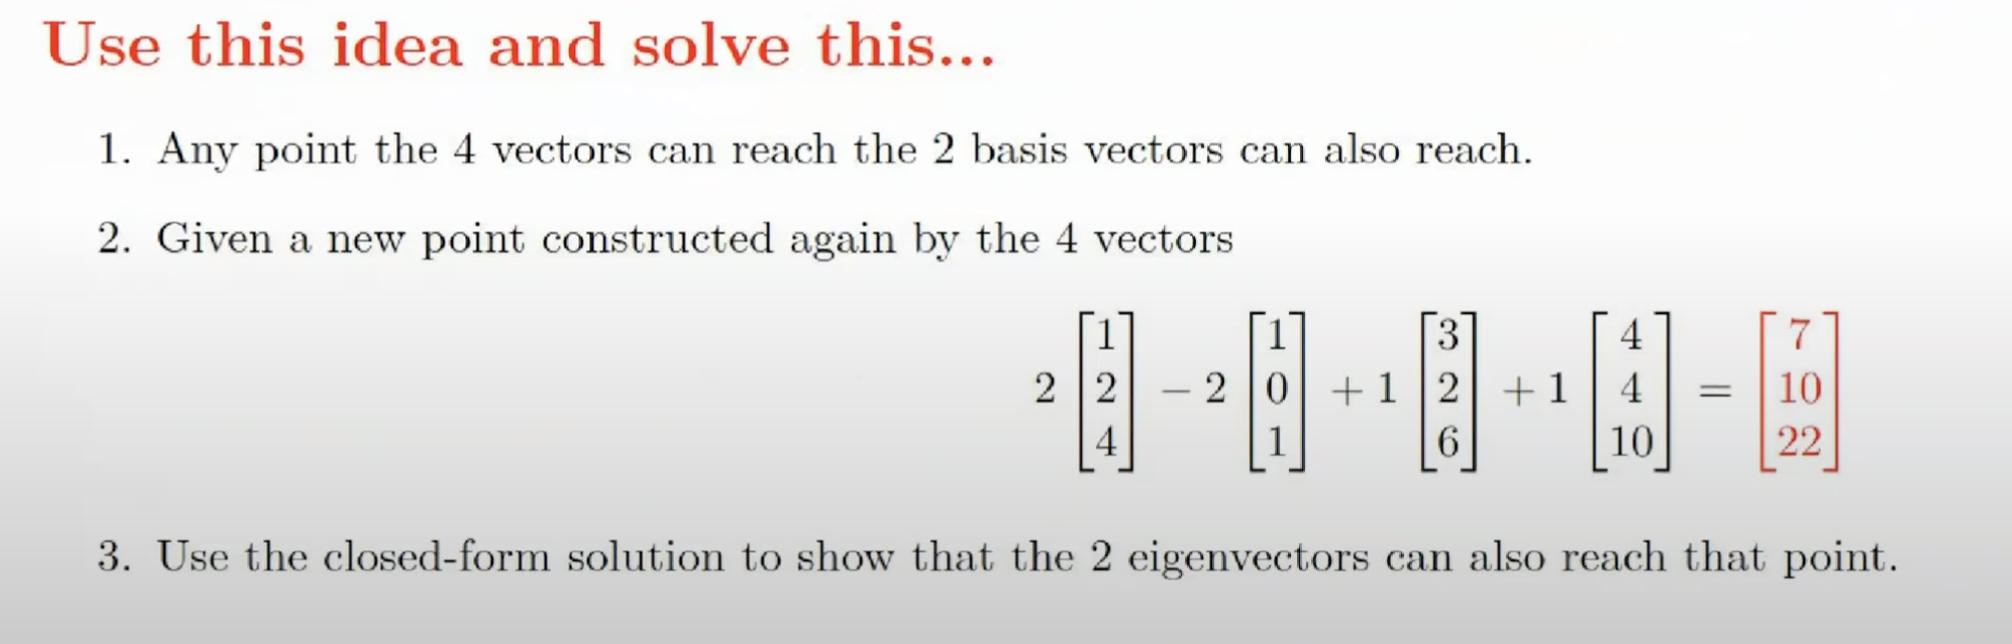

\begin{align*}
U\,\mathbf a &= \begin{bmatrix}7\\10\\22\end{bmatrix},\\[4pt]
\mathbf a &= (U^{\top}U)^{-1}U^{\top}\mathbf y .
\end{align*}


In [47]:
y = array([7, 10, 22])

a = np.linalg.inv((U.T @ U)) @ U.T @ y
show_mat(a)

<IPython.core.display.Math object>

In [50]:
show_mat(U@a, name='y')

<IPython.core.display.Math object>

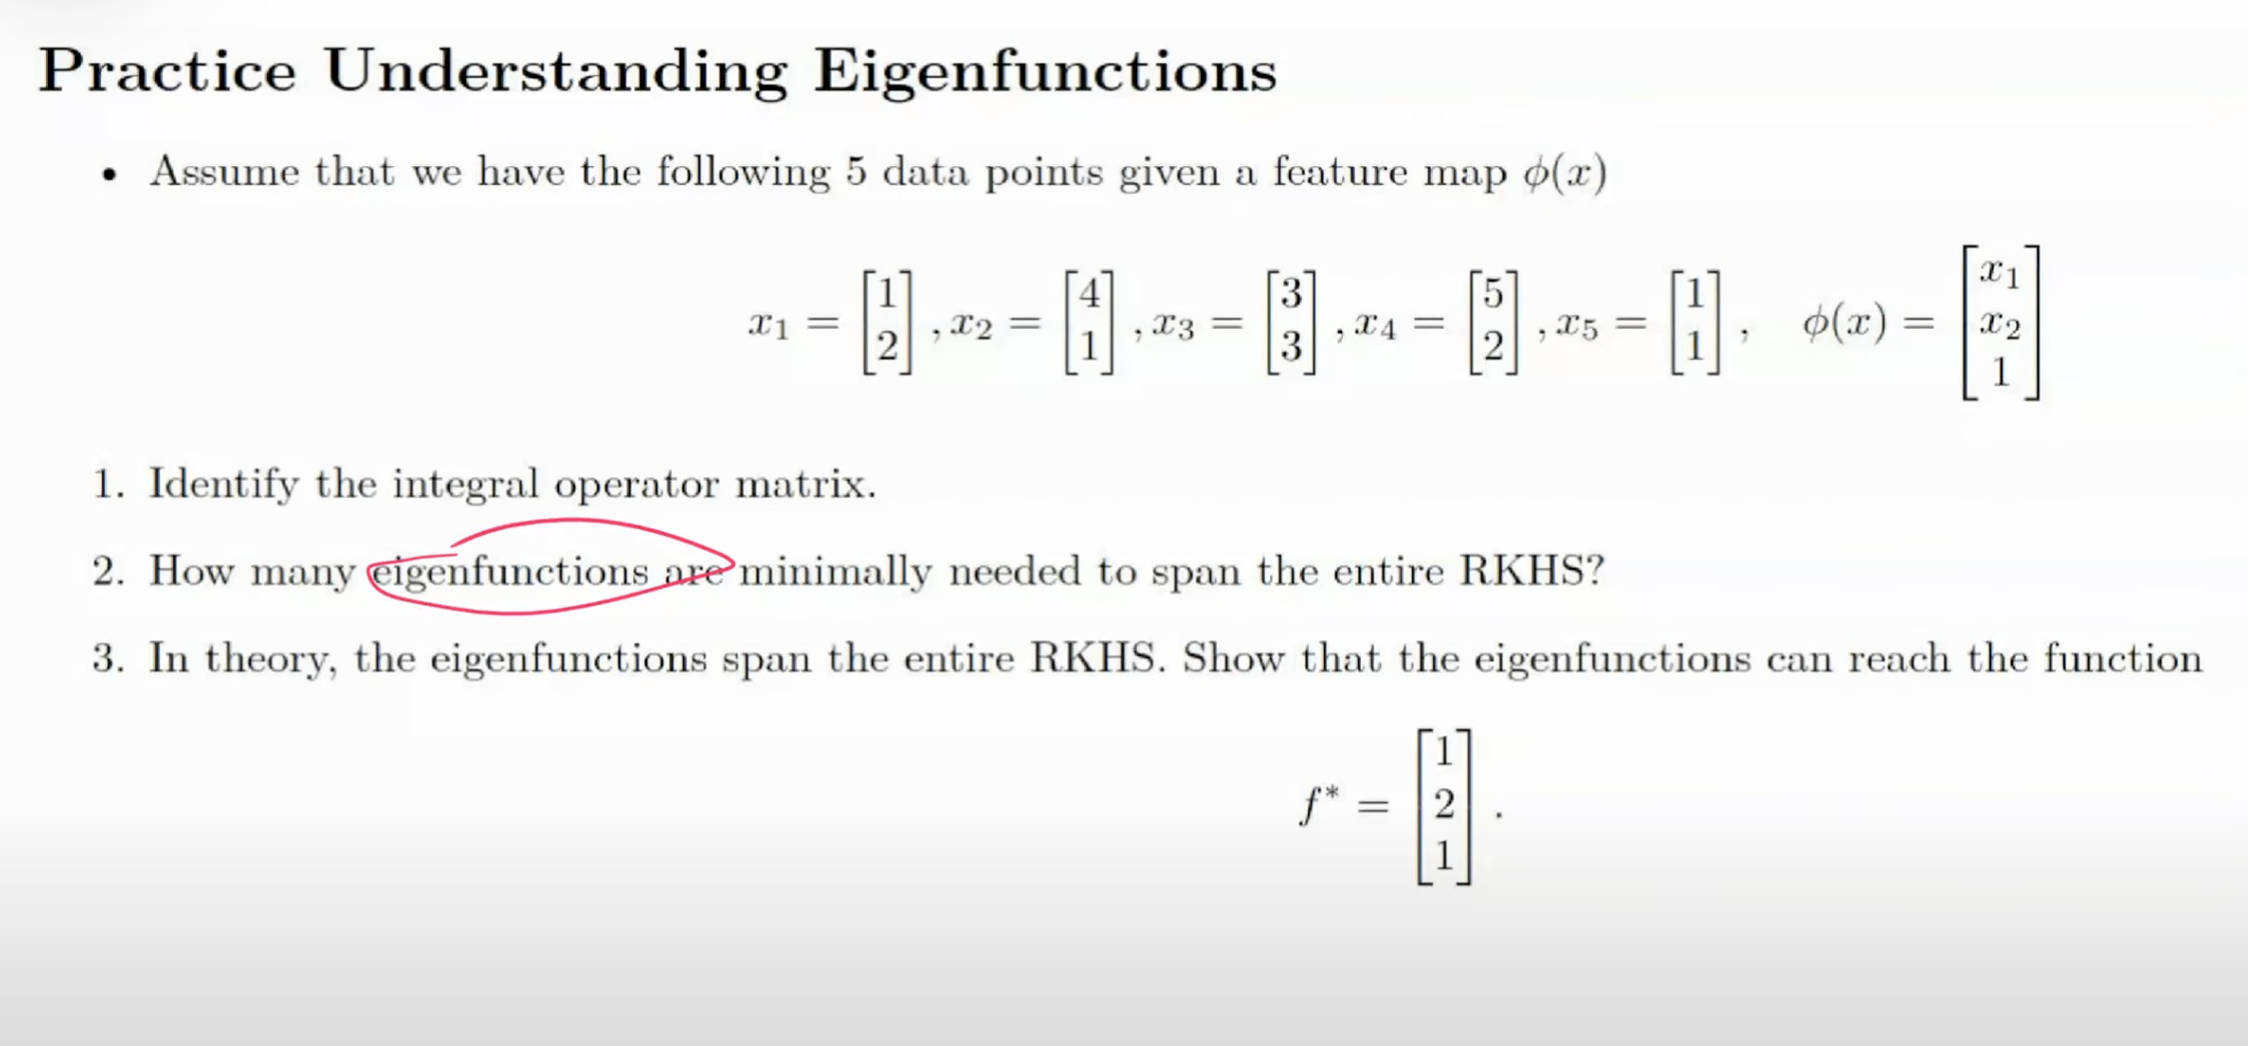

In [82]:
X = np.array([
    [1, 2],   # x1
    [4, 1],   # x2
    [3, 3],   # x3
    [5, 2],   # x4
    [1, 1]    # x5
])

def phi(x):
    return np.r_[x, 1]          # concat 1 at the end

In [84]:
Phi_list = [phi(x).reshape(-1, 1) for x in X]  # column vectors
Phi = np.hstack(Phi_list).T                    # 3×5 matrix whose columns are φ(x_i)

show_mat(Phi)

<IPython.core.display.Math object>

In [86]:
L_hat = (Phi.T @ Phi) / 2

show_mat(L_hat)

<IPython.core.display.Math object>

In [94]:
D, U = eigh(L_hat.dot(L_hat.T))

show_mat(D, name='D')

<IPython.core.display.Math object>

In [88]:
show_mat(U, name='U')

<IPython.core.display.Math object>

In [95]:
y = array([1, 2, 1])

a = np.linalg.inv((U.T @ U)) @ U.T @ y
show_mat(a)

<IPython.core.display.Math object>

In [96]:
y_pred = U @ a
show_mat(y_pred, name='y_pred')

<IPython.core.display.Math object>

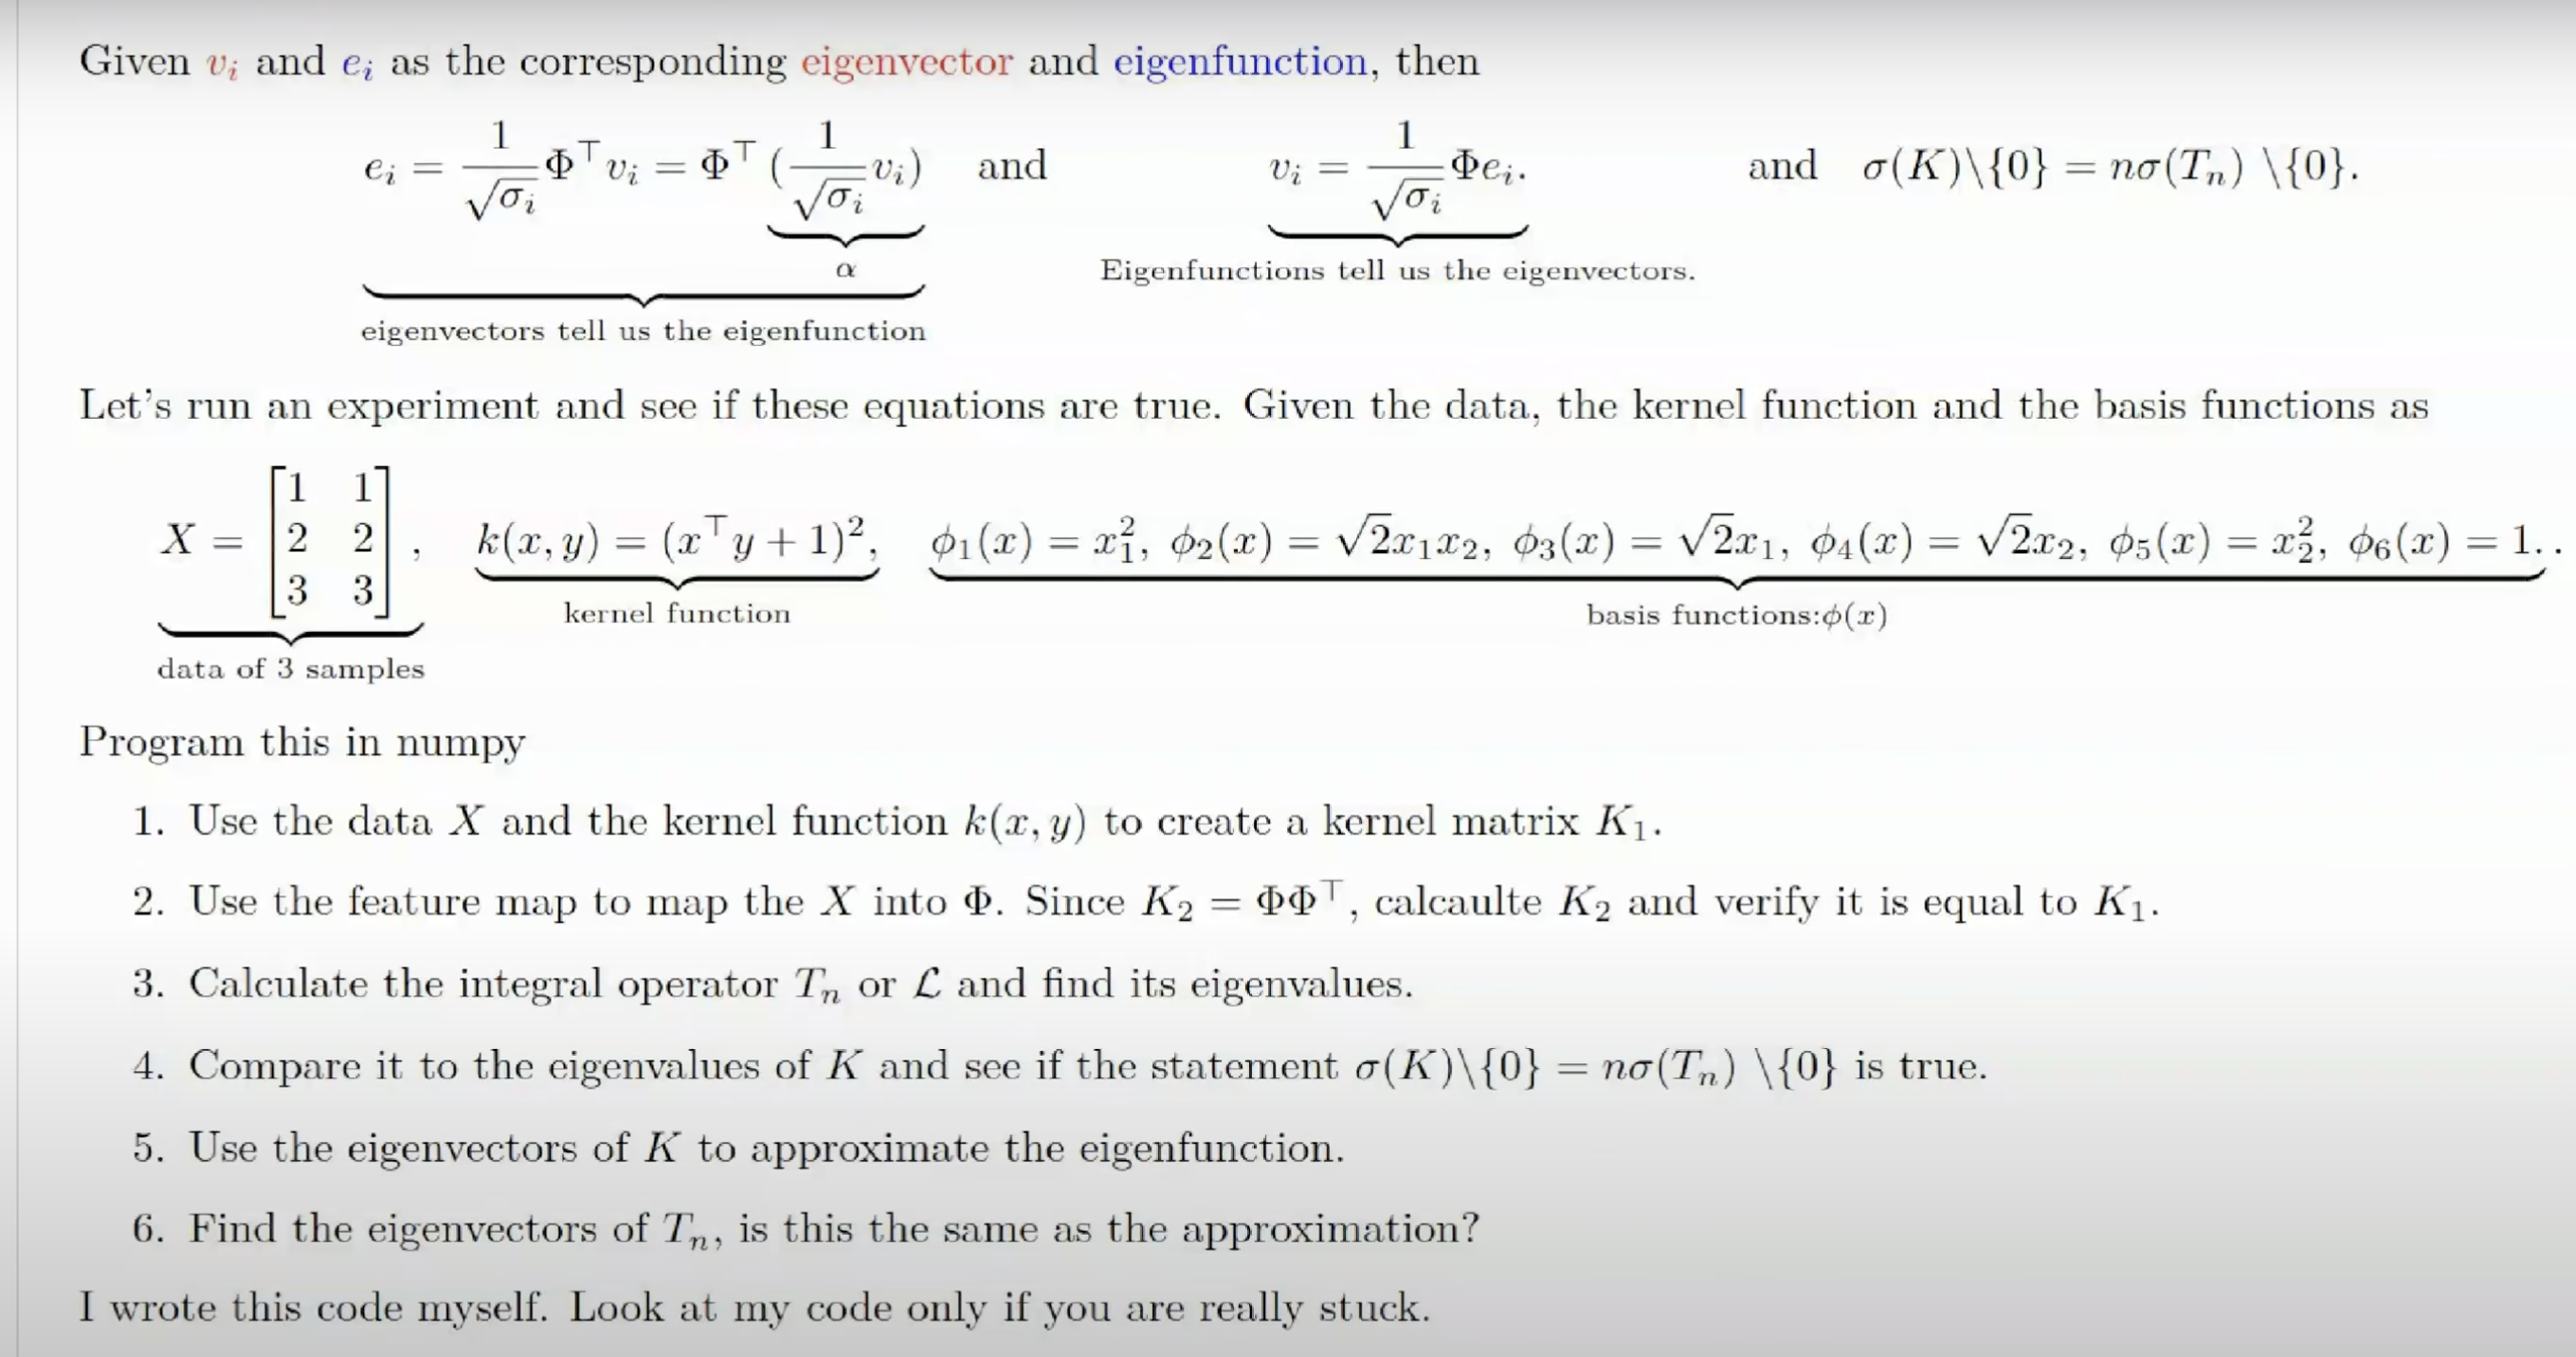

In [97]:
X = np.array([[1., 1.],
              [2., 2.],
              [3., 3.]])          # 3 samples in R^2
n = X.shape[0]

def poly2_kernel(X, Y=None):
    if Y is None: Y = X
    return (X @ Y.T + 1.0) ** 2

def phi(x):
    x1, x2 = x
    return np.array([
        x1**2,
        np.sqrt(2)*x1*x2,
        np.sqrt(2)*x1,
        np.sqrt(2)*x2,
        x2**2,
        1.0
    ])

## #1 K1, Kernel Matrix with kernel function 

In [98]:
K1 = poly2_kernel(X)          # 3 × 3
show_mat(K1)


<IPython.core.display.Math object>

## #2 K2 with feature map

In [101]:
Phi = np.array([phi(x) for x in X])  # 3 × 6
K2 = Phi @ Phi.T              


show_mat(K2, name='K2')
#show_mat(K1 - K2, name='K1 - K2')

<IPython.core.display.Math object>

## #3 empirical integral operator 

In [105]:
show_mat(Phi, name='Phi')

<IPython.core.display.Math object>

In [103]:
Tn = (Phi.T @ Phi) / n        # d_feat × d_feat  (6 × 6)
lam_Tn, U_Tn = np.linalg.eigh(Tn)   # eigenvalues/eigenvectors
show_mat(lam_Tn, name='integral operator Eigenvalues')

<IPython.core.display.Math object>

In [106]:
show_mat(U_Tn, name='integral operator Eigenfunctions')

<IPython.core.display.Math object>

### Step 4. Compare eigenvalues:

In [108]:
lam_K, V_K = np.linalg.eigh(K1)   # eigenvalues/eigenvectors of K (n×n)
# sort just in case
lam_K_sorted   = np.sort(lam_K)
lam_Tn_scaled  = np.sort(n * lam_Tn)     # scale Tn eigenvalues by n


print("eigs(K):       ", lam_K_sorted)
print("n * eigs(Tn):  ", lam_Tn_scaled)


eigs(K):        [  0.04    3.608 447.352]
n * eigs(Tn):   [ -0.     -0.      0.      0.04    3.608 447.352]


## Step 5. Use eigenvectors of K to approximate eigenfunctions

In [112]:
# pick non-zero eigenvalues (numerical threshold)
eps = 1e-10
nz = lam_K > eps

eigfunc_coeffs = []
for sigma_i, v_i in zip(lam_K[nz], V_K[:, nz].T):
    e_i = (Phi.T @ v_i) / np.sqrt(sigma_i)   # 6-dim coefficients in basis φ
    eigfunc_coeffs.append(e_i)

eigfunc_coeffs = np.stack(eigfunc_coeffs, axis=1)  # 6 × r
print("Eigenfunction coeffs (columns correspond to eigenfunctions):\n", eigfunc_coeffs)



Eigenfunction coeffs (columns correspond to eigenfunctions):
 [[ 0.058  0.167 -0.468]
 [ 0.082  0.236 -0.662]
 [-0.343 -0.568 -0.245]
 [-0.343 -0.568 -0.245]
 [ 0.058  0.167 -0.468]
 [ 0.866 -0.495 -0.068]]


### Step 6. Eigenvectors of T, Is this the same approximation?

In [113]:
# Normalize Tn eigenvectors the same way and compare
# (Drop zero eigenvalues)
nz_Tn = lam_Tn > eps
U_Tn_nz   = U_Tn[:, nz_Tn]
lam_Tn_nz = lam_Tn[nz_Tn]

# scale to make them comparable with e_i (optional)
scaled_U_Tn = U_Tn_nz  # already eigenvectors in feature space

print("Tn eigenvectors (feature space):\n", scaled_U_Tn)

# Check subspace equality by projecting
proj = np.linalg.norm(
    scaled_U_Tn @ scaled_U_Tn.T - eigfunc_coeffs @ np.linalg.pinv(eigfunc_coeffs), 'fro'
)
print("Frobenius norm of projector difference (should be ~0):", proj)


Tn eigenvectors (feature space):
 [[-0.058 -0.167 -0.468]
 [-0.082 -0.236 -0.662]
 [ 0.343  0.568 -0.245]
 [ 0.343  0.568 -0.245]
 [-0.058 -0.167 -0.468]
 [-0.866  0.495 -0.068]]
Frobenius norm of projector difference (should be ~0): 7.177096903404285e-14


In [111]:
# Evaluate an eigenfunction at a new x_new
def eval_eigfunc(e_coeff, x_new):
    return e_coeff @ phi(x_new)

x_new = np.array([4., 4.])
vals = [eval_eigfunc(c, x_new) for c in eigfunc_coeffs.T]
print("Eigenfunctions evaluated at x_new=", x_new, ":\n", vals)


Eigenfunctions evaluated at x_new= [4. 4.] :
 [0.709742934746781, 3.74821318586159, -32.77876085028094]
